In [1]:
#!pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 
  
# data (as pandas dataframes) 
X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 
  
# metadata 
print(phiusiil_phishing_url_website.metadata) 
  
# variable information 
print(phiusiil_phishing_url_website.variables) 


{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

## Feature Selection

### Feature Selection by Variance Threshold

In [2]:
X.head()

URL  URLLength  ... NoOfEmptyRef  NoOfExternalRef
0    https://www.southbankmosaics.com         31  ...            0              124
1            https://www.uni-mainz.de         23  ...            0              217
2      https://www.voicefmradio.co.uk         29  ...            2                5
3         https://www.sfnmjournal.com         26  ...            1               31
4  https://www.rewildingargentina.org         33  ...            1               85

[5 rows x 54 columns]

In [3]:
X.dtypes

URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineL

In [4]:
y.head()

label
0      1
1      1
2      1
3      1
4      1

In [5]:
import pandas as pd

data = pd.concat([y, X], axis=1)
data.head()

label                                 URL  ...  NoOfEmptyRef NoOfExternalRef
0      1    https://www.southbankmosaics.com  ...             0             124
1      1            https://www.uni-mainz.de  ...             0             217
2      1      https://www.voicefmradio.co.uk  ...             2               5
3      1         https://www.sfnmjournal.com  ...             1              31
4      1  https://www.rewildingargentina.org  ...             1              85

[5 rows x 55 columns]

In [6]:
print(f"Initial shape of the data: {data.shape}")

Initial shape of the data: (235795, 55)


In [7]:
X.describe()

URLLength   DomainLength  ...   NoOfEmptyRef  NoOfExternalRef
count  235795.000000  235795.000000  ...  235795.000000    235795.000000
mean       34.573095      21.470396  ...       2.377629        49.262516
std        41.314153       9.150793  ...      17.641097       161.027430
min        13.000000       4.000000  ...       0.000000         0.000000
25%        23.000000      16.000000  ...       0.000000         1.000000
50%        27.000000      20.000000  ...       0.000000        10.000000
75%        34.000000      24.000000  ...       1.000000        57.000000
max      6097.000000     110.000000  ...    4887.000000     27516.000000

[8 rows x 50 columns]

In [8]:
import pandas as pd

# Assuming X is your DataFrame
categorical_features = X.select_dtypes(include=['object', 'category']).columns
print(categorical_features)

Index(['URL', 'Domain', 'TLD', 'Title'], dtype='object')


In [9]:
X_categorical = X.select_dtypes(include=['object', 'category'])
X_categorical.head()

URL  ...                                              Title
0    https://www.southbankmosaics.com  ...  à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1            https://www.uni-mainz.de  ...              johannes gutenberg-universitÃ¤t mainz
2      https://www.voicefmradio.co.uk  ...                               voice fm southampton
3         https://www.sfnmjournal.com  ...  home page: seminars in fetal and neonatal medi...
4  https://www.rewildingargentina.org  ...                     fundaciÃ³n rewilding argentina

[5 rows x 4 columns]

In [11]:
# data['TLD'] = data['TLD'].astype('object')

# data = pd.get_dummies(data)

# MemoryError: Unable to allocate 51.7 GiB for an array with shape (235795, 235370) and data type bool

In [10]:
numeric_features = X.select_dtypes(include=['number']).columns
print(numeric_features)

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')


In [11]:
X_numeric = X.select_dtypes(include=['number'])
X_numeric.head()

URLLength  DomainLength  ...  NoOfEmptyRef  NoOfExternalRef
0         31            24  ...             0              124
1         23            16  ...             0              217
2         29            22  ...             2                5
3         26            19  ...             1               31
4         33            26  ...             1               85

[5 rows x 50 columns]

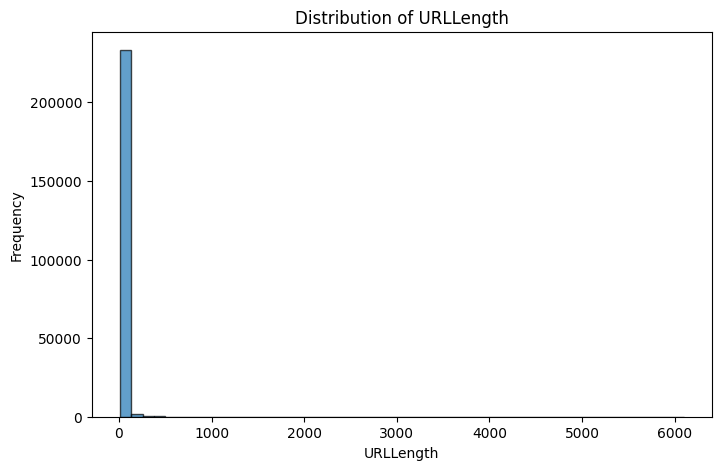

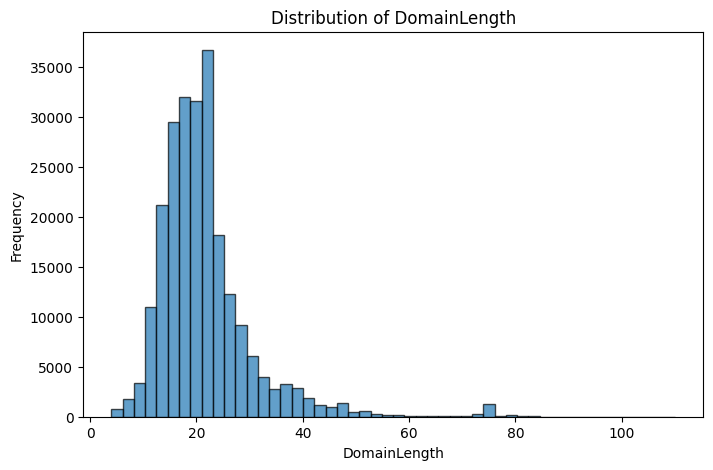

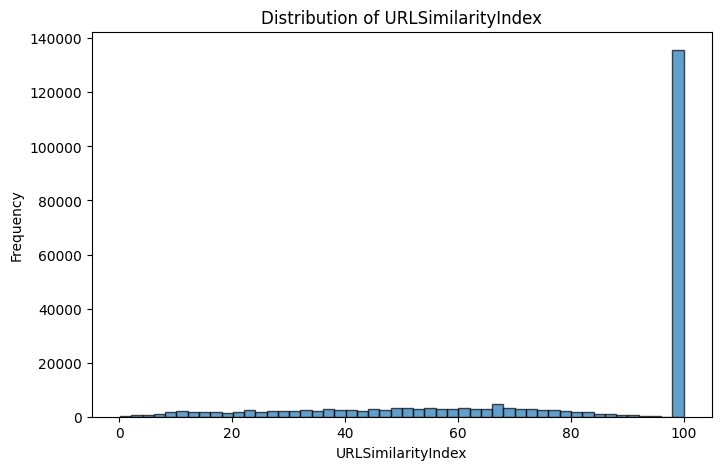

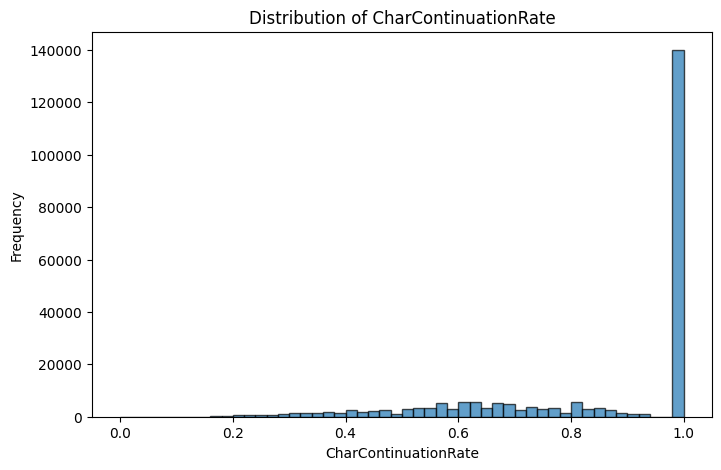

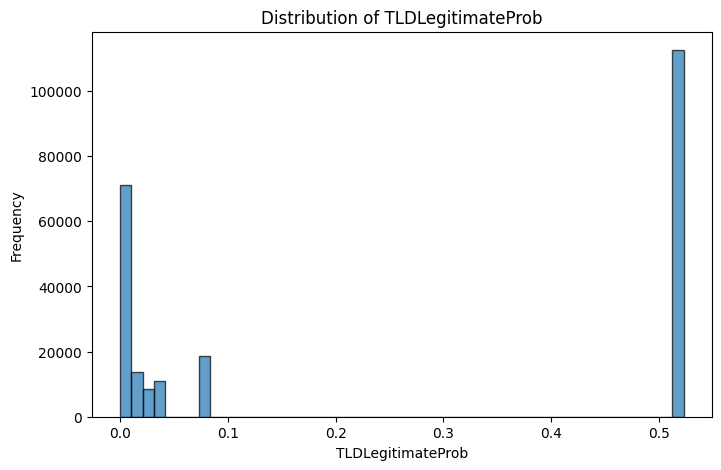

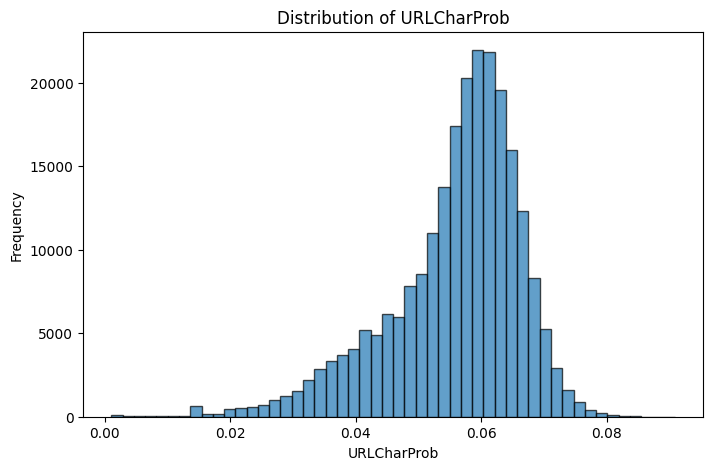

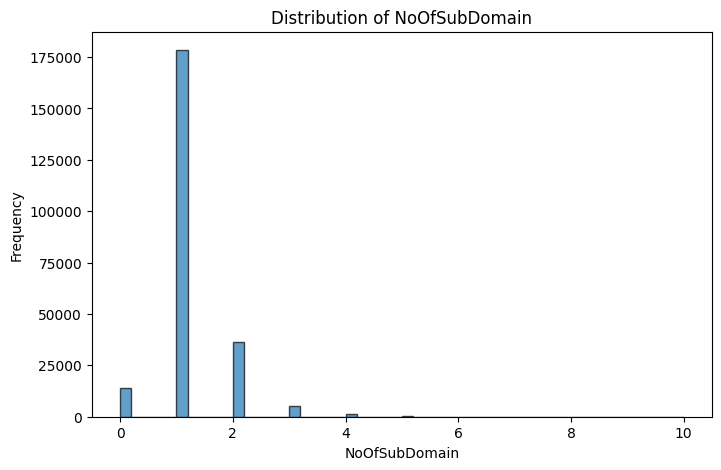

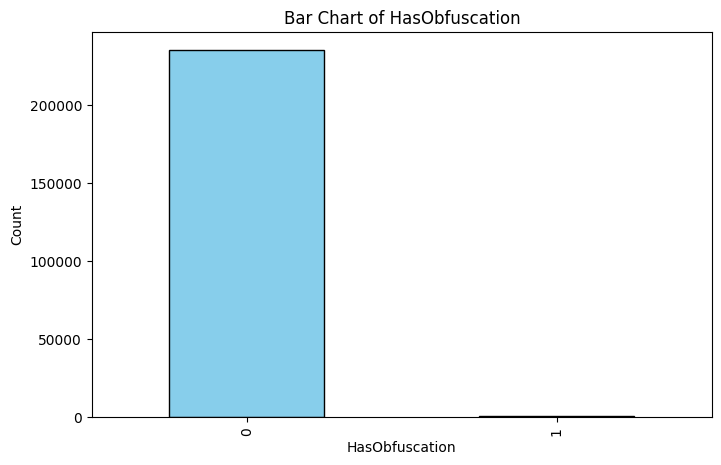

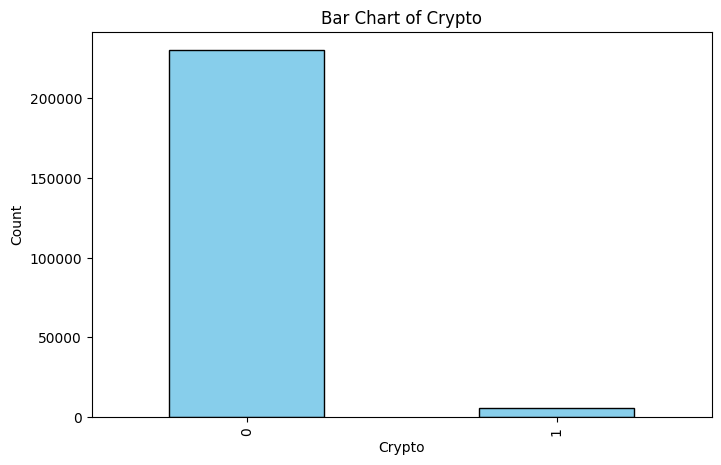

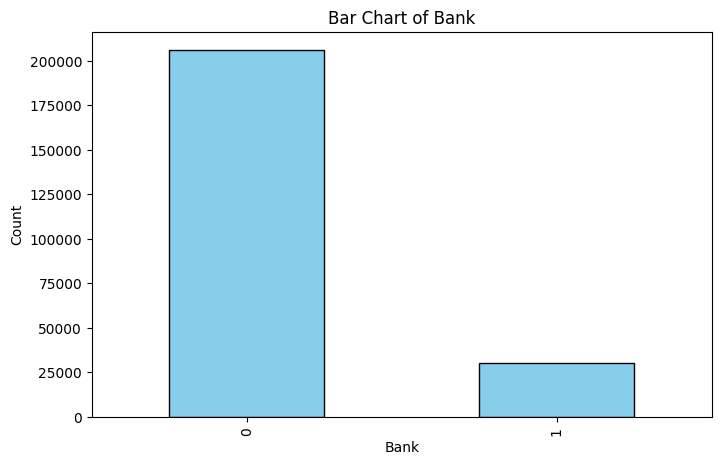

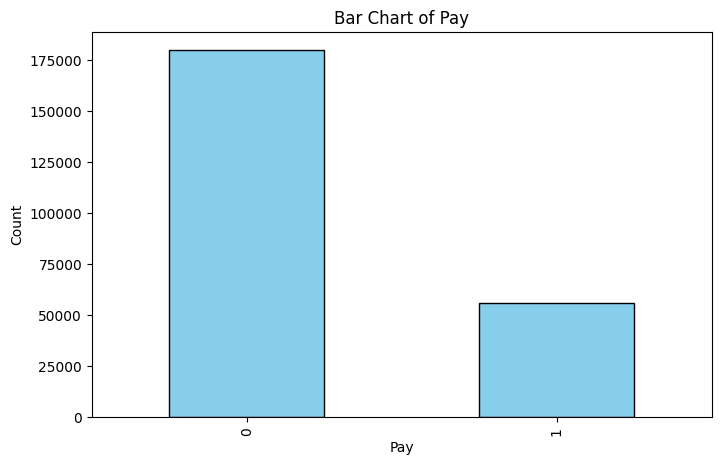

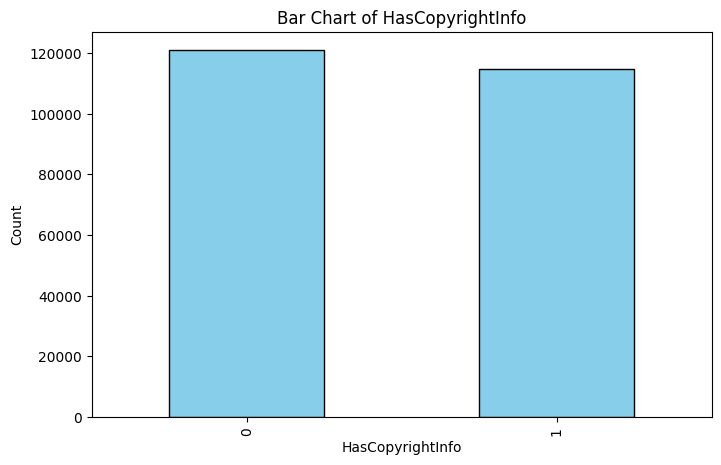

In [12]:
# EDA Authored by Richard DiazDeLeon

import matplotlib.pyplot as plt

numerical_columns = ['URLLength', 'DomainLength', 'URLSimilarityIndex', 
                     'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 
                     'NoOfSubDomain']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(X[column], bins=50, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

categorical_columns = ['HasObfuscation', 'Crypto', 'Bank', 'Pay', 'HasCopyrightInfo']

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    X[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='k')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Feature Selection by Variance Threshold

In [13]:
# Feature Selection and Extraction Authored by Nate Talampas

print(X_numeric.var())

URLLength                     1.706859e+03
DomainLength                  8.373702e+01
IsDomainIP                    2.698431e-03
URLSimilarityIndex            8.396117e+02
CharContinuationRate          4.692961e-02
TLDLegitimateProb             6.331677e-02
URLCharProb                   1.120862e-04
TLDLength                     3.596865e-01
NoOfSubDomain                 3.611641e-01
HasObfuscation                2.052649e-03
NoOfObfuscatedChar            3.520311e+00
ObfuscationRatio              1.457109e-05
NoOfLettersInURL              8.462473e+02
LetterRatioInURL              1.520651e-02
NoOfDegitsInURL               1.412935e+02
DegitRatioInURL               5.026428e-03
NoOfEqualsInURL               8.736718e-01
NoOfQMarkInURL                3.744434e-02
NoOfAmpersandInURL            6.996445e-01
NoOfOtherSpecialCharsInURL    1.244399e+01
SpacialCharRatioInURL         1.049305e-03
IsHTTPS                       1.701240e-01
LineOfCode                    1.169606e+07
LargestLine

In [14]:
from sklearn.feature_selection import VarianceThreshold

# applying variance threshold
thresholder = VarianceThreshold(threshold=0.1)
X_high_variance = thresholder.fit_transform(X_numeric)

# Convert the numpy array back to a DataFrame
# Retrieve the retained feature indices
features = thresholder.get_support(indices=True)
X_high_variance_df = pd.DataFrame(X_high_variance, columns=[X_numeric.columns[i] for i in features])

print("Shape of data after Variance Threshold:", X_high_variance_df.shape)
X_high_variance_df.head()

Shape of data after Variance Threshold: (235795, 36)


URLLength  DomainLength  ...  NoOfEmptyRef  NoOfExternalRef
0       31.0          24.0  ...           0.0            124.0
1       23.0          16.0  ...           0.0            217.0
2       29.0          22.0  ...           2.0              5.0
3       26.0          19.0  ...           1.0             31.0
4       33.0          26.0  ...           1.0             85.0

[5 rows x 36 columns]

In [15]:
X_high_variance_df.columns

Index(['URLLength', 'DomainLength', 'URLSimilarityIndex', 'TLDLength',
       'NoOfSubDomain', 'NoOfObfuscatedChar', 'NoOfLettersInURL',
       'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'Bank', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')

# Feature Selection by Correlation Between Input Features

In [16]:
# Calculate the correlation matrix
corr_matrix = X_numeric.corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                            URLLength  ...  NoOfExternalRef
URLLength                    1.000000  ...        -0.059055
DomainLength                 0.243091  ...        -0.070099
IsDomainIP                   0.277272  ...        -0.015269
URLSimilarityIndex          -0.421104  ...         0.221960
CharContinuationRate        -0.241104  ...         0.121745
TLDLegitimateProb           -0.016656  ...         0.033182
URLCharProb                 -0.245215  ...         0.120841
TLDLength                    0.033339  ...        -0.026486
NoOfSubDomain                0.071058  ...        -0.001538
HasObfuscation               0.161980  ...        -0.013342
NoOfObfuscatedChar           0.459094  ...        -0.003515
ObfuscationRatio             0.127472  ...        -0.010588
NoOfLettersInURL             0.956047  ...        -0.065286
LetterRatioInURL             0.312632  ...        -0.090799
NoOfDegitsInURL              0.835809  ...        -0.045175
DegitRatioInURL     

Pairs with high correlation (|correlation| > 0.85):
URLLength and NoOfLettersInURL: 0.96
DomainTitleMatchScore and URLTitleMatchScore: 0.96


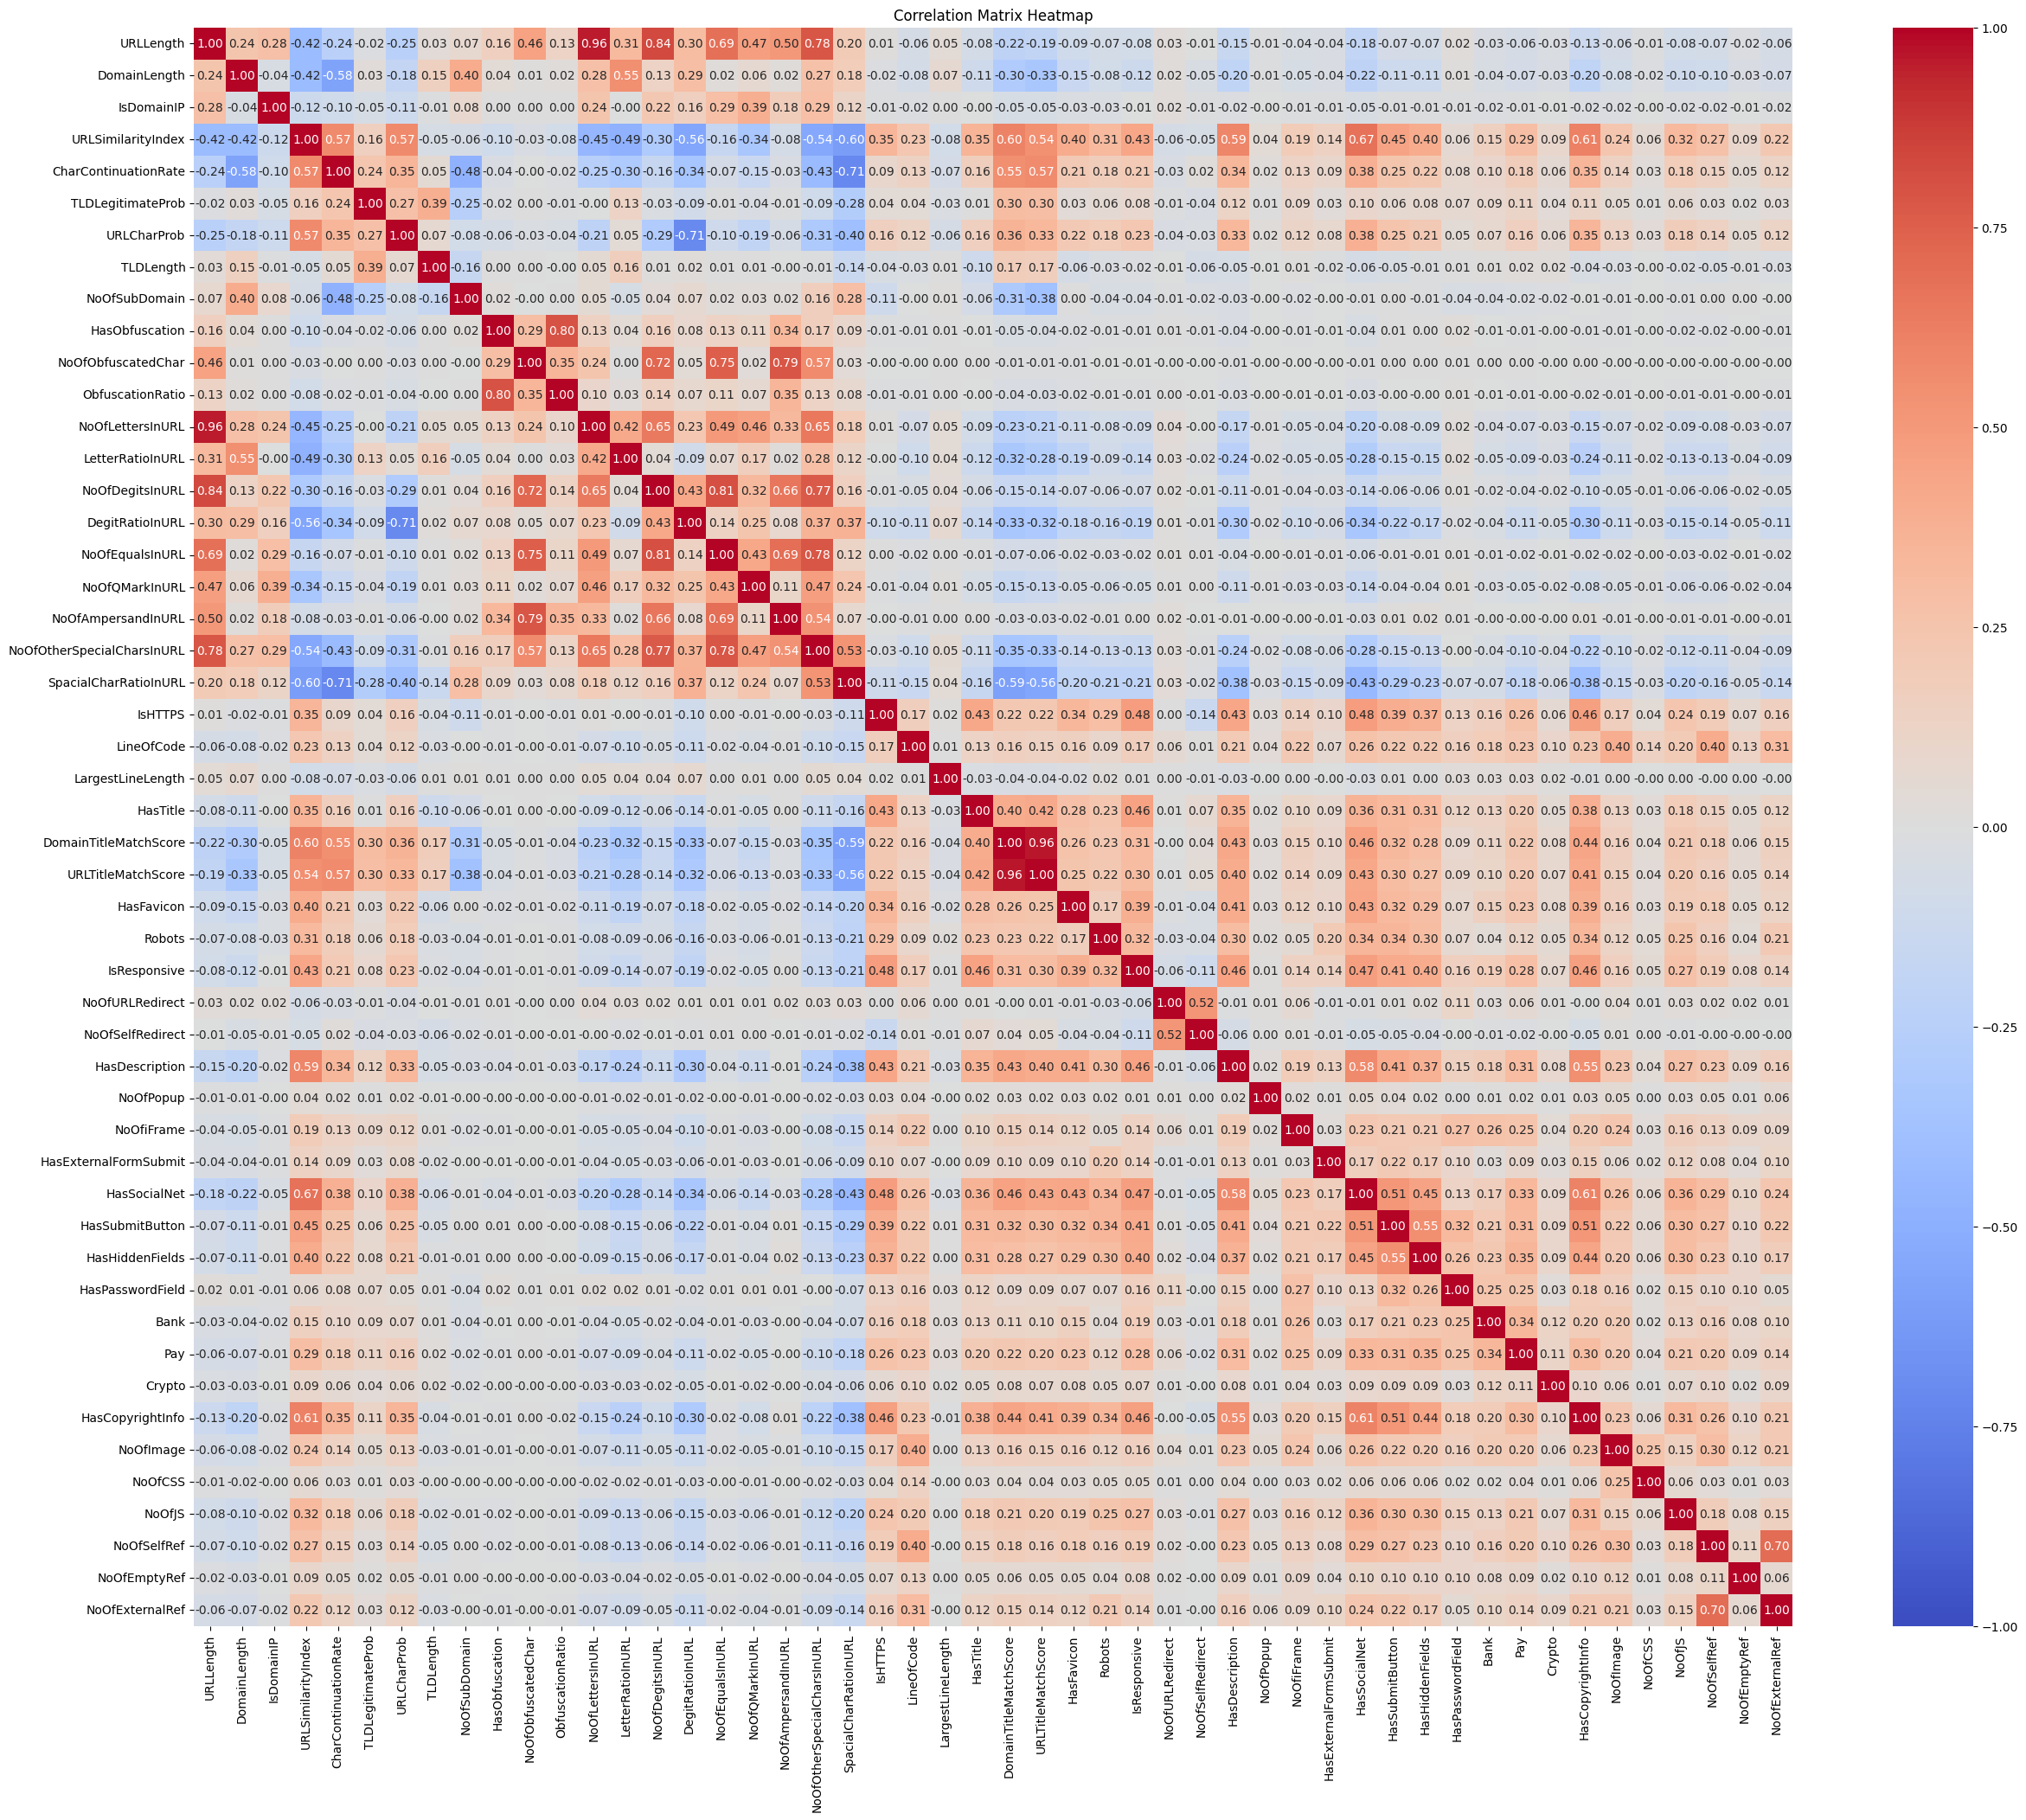

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Define threshold
threshold = 0.85

# Find pairs with high correlation
high_corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs[(corr_matrix.columns[i], corr_matrix.columns[j])] = corr_matrix.iloc[i, j]

# Print out high correlation pairs
print("Pairs with high correlation (|correlation| > {:.2f}):".format(threshold))
for pair, corr_value in high_corr_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {corr_value:.2f}")

# Visualize the correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

Let's drop columns: `NoOfLettersInURL`, `DomainTitleMatchScore`...

Let's acknowledge `URL` and `Domain` as unique identifiers, so we're gonna drop those as well.

In [18]:
columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'TLDLength',
       'NoOfSubDomain', 'NoOfObfuscatedChar',
       'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle',
       'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'Bank', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef'
    ]

X_new = X[columns]  # This will select only the columns listed above

X_new.head()

URLLength  DomainLength  ...  NoOfEmptyRef  NoOfExternalRef
0         31            24  ...             0              124
1         23            16  ...             0              217
2         29            22  ...             2                5
3         26            19  ...             1               31
4         33            26  ...             1               85

[5 rows x 34 columns]

# Dimensionality Reduction

In [19]:
y.shape

(235795, 1)

In [20]:
X_new.shape

(235795, 34)

In [21]:
# proportion of target

proportions = y.value_counts(normalize=True)

# Display the proportions
print("Proportion of each class in y:")
print(proportions)

Proportion of each class in y:
label
1        0.571895
0        0.428105
Name: proportion, dtype: float64


In [22]:
data_new = pd.concat([y, X_new], axis=1)
data_new.head()

label  URLLength  DomainLength  ...  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef
0      1         31            24  ...          119             0              124
1      1         23            16  ...           39             0              217
2      1         29            22  ...           42             2                5
3      1         26            19  ...           22             1               31
4      1         33            26  ...           72             1               85

[5 rows x 35 columns]

In [23]:
data_sample = data_new.sample(n=5000, random_state=42)

y_new = data_sample.iloc[:, 0]     # Labels (First column)
X_new = data_sample.iloc[:, 1:]

print(y_new.value_counts(normalize=True)) # similar proportion! yay!

label
1    0.5682
0    0.4318
Name: proportion, dtype: float64


### PCA
- decent... but there's a lot of overlap at the zero points of the first and second dimension.

In [24]:
# okay let's hope this pca runs!!!
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder


# If the labels are categorical, we need to convert them to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_new)

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_new)


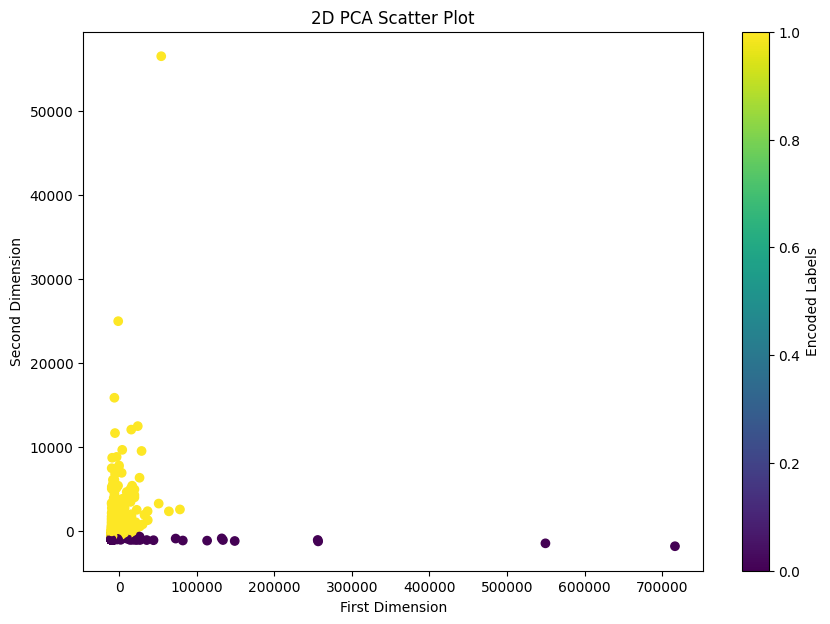

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly sample data from the PCA results
np.random.seed(42)
X_sample_pca = np.random.choice(len(pca_result), size=1000, replace=False)
pca_sample_result = pca_result[X_sample_pca]
y_sample_pca = y_new.iloc[X_sample_pca]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_pca = plt.scatter(
    pca_sample_result[:, 0],  # First Dimension
    pca_sample_result[:, 1],  # Second Dimension
    c=y_sample_pca,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D PCA Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_pca)
cbar.set_label('Encoded Labels')

plt.show()


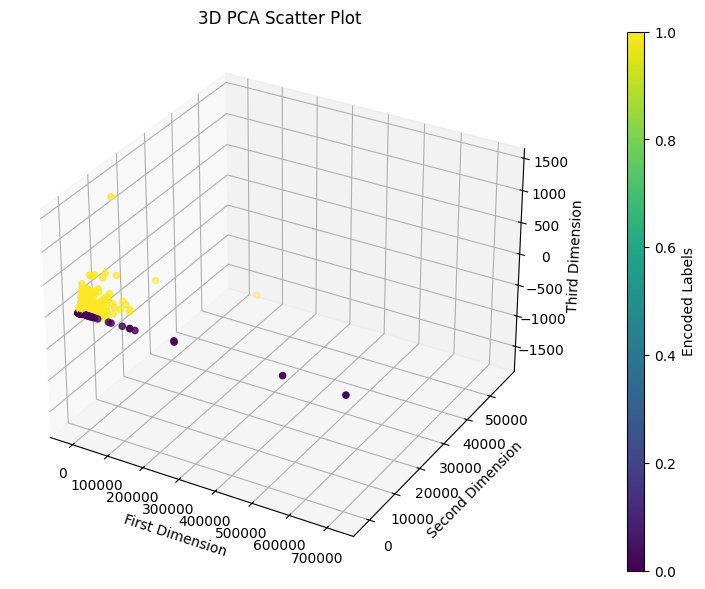

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Randomly sample data from the MDS results
np.random.seed(42)
X_sample_pca = np.random.choice(len(pca_result), size=1000, replace=False)
pca_sample_result = pca_result[X_sample_pca]
y_sample_pca = y_new.iloc[X_sample_pca]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter_pca = ax.scatter(
    pca_sample_result[:, 0],  # First MDS Dimension
    pca_sample_result[:, 1],  # Second MDS Dimension
    pca_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_pca,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D PCA Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_pca, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

### MDS
- bad

In [28]:
# Perform MDS to reduce to 2 components
mds = MDS(n_components=3, random_state=42)
mds_result = mds.fit_transform(X_new)

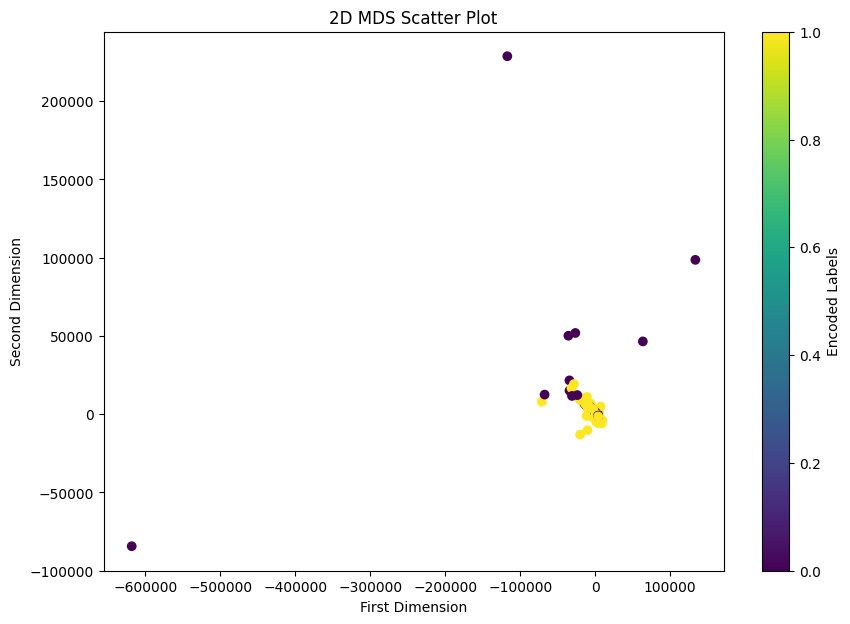

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_sample_mds = np.random.choice(len(mds_result), size=1000, replace=False)
mds_sample_result = mds_result[X_sample_mds]
y_sample_mds = y_new.iloc[X_sample_mds]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_mds = plt.scatter(
    mds_sample_result[:, 0],  # First Dimension
    mds_sample_result[:, 1],  # Second Dimension
    c=y_sample_mds,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D MDS Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_mds)
cbar.set_label('Encoded Labels')

plt.show()


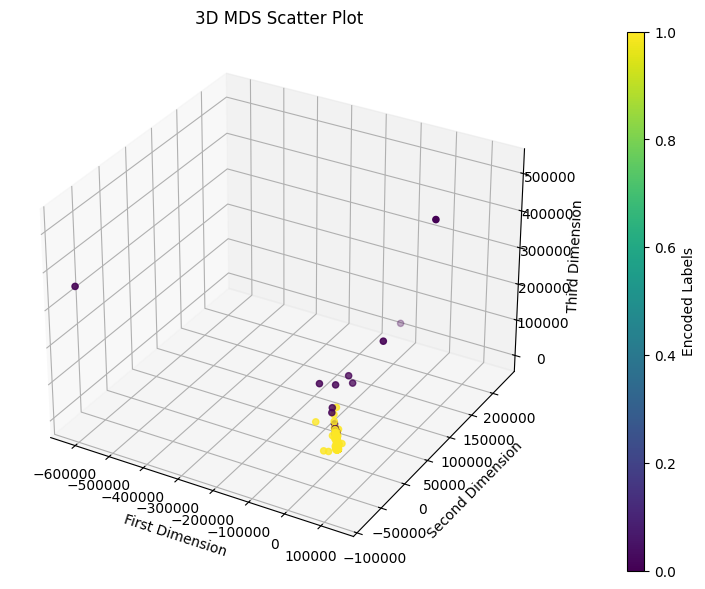

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Randomly sample data from the MDS results
np.random.seed(42)
X_sample_mds = np.random.choice(len(mds_result), size=1000, replace=False)
mds_sample_result = mds_result[X_sample_mds]
y_sample_mds = y_new.iloc[X_sample_mds]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# # Rotate the 3D plot by adjusting the viewing angle
# ax.view_init(elev=30, azim=45)  # Example: Elevation = 30 degrees, Azimuth = 45 degrees

# Plot the data points in 3D
scatter_mds = ax.scatter(
    mds_sample_result[:, 0],  # First MDS Dimension
    mds_sample_result[:, 1],  # Second MDS Dimension
    mds_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_mds,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D MDS Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_mds, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()


### PCA
PCA separated phishing from nonphishing emails into two orthogonal vectors.

### MDS
MDS failed to separate any significant clusters.

# Nonlinear Dimensionality Reduction Techniques

### Isomap
- not great either

In [27]:
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE

isomap_result = Isomap(n_neighbors=10,n_components=3).fit_transform(X_new)

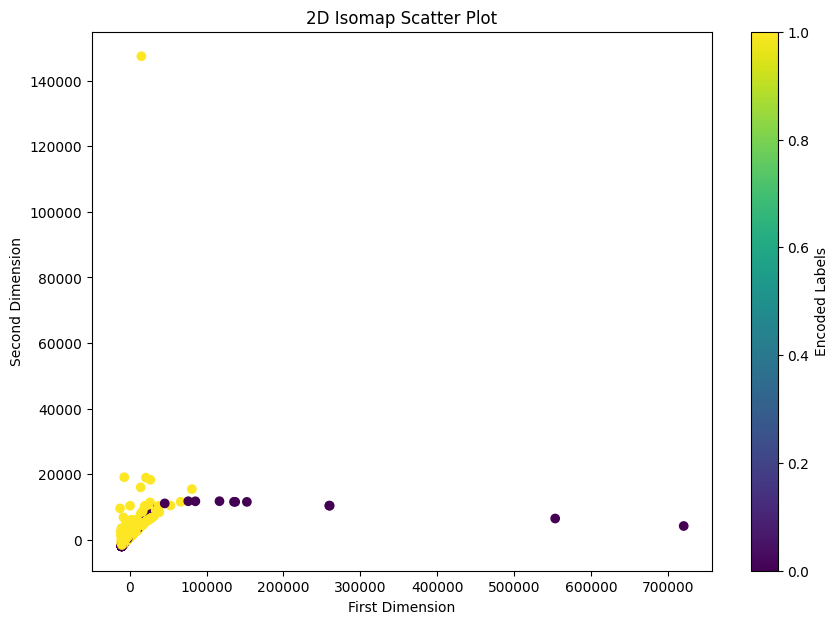

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_sample_isomap = np.random.choice(len(isomap_result), size=1000, replace=False)
isomap_sample_result = isomap_result[X_sample_isomap]
y_sample_isomap = y_new.iloc[X_sample_isomap]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_isomap = plt.scatter(
    isomap_sample_result[:, 0],  # First Dimension
    isomap_sample_result[:, 1],  # Second Dimension
    c=y_sample_isomap,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D Isomap Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_isomap)
cbar.set_label('Encoded Labels')

plt.show()

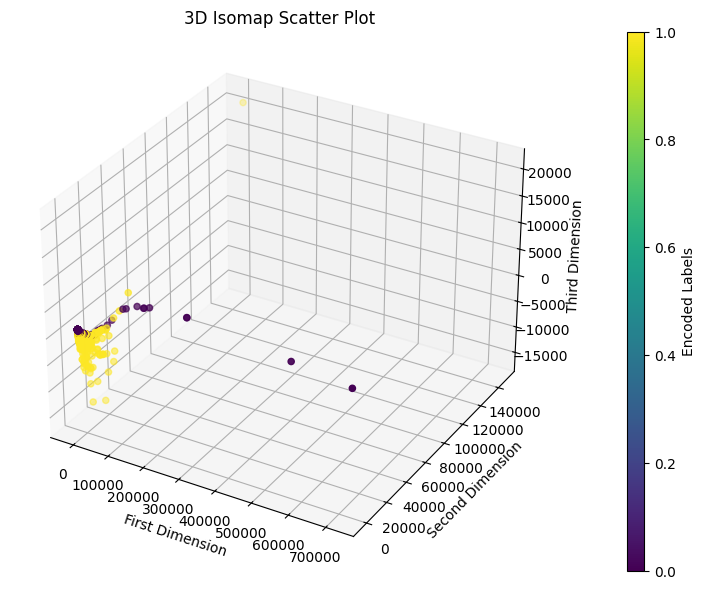

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X_sample_isomap = np.random.choice(len(isomap_result), size=1000, replace=False)
isomap_sample_result = isomap_result[X_sample_isomap]
y_sample_isomap = y_new.iloc[X_sample_isomap]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter_isomap = ax.scatter(
    isomap_sample_result[:, 0],  # First MDS Dimension
    isomap_sample_result[:, 1],  # Second MDS Dimension
    isomap_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_isomap,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D Isomap Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_isomap, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()


### LLE
- not great either.

In [30]:
lle_result = LocallyLinearEmbedding(n_neighbors=12, n_components=3).fit_transform(X_new)

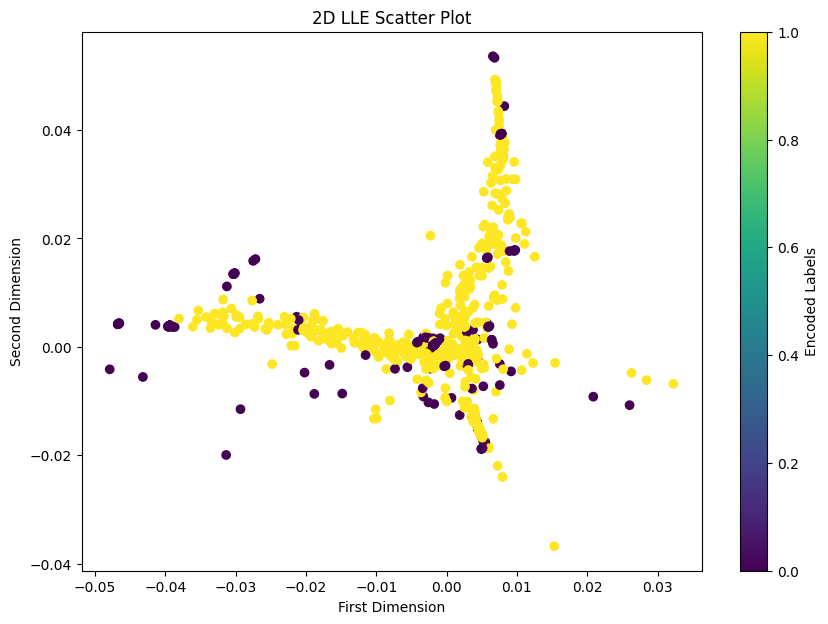

In [31]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_sample_lle = np.random.choice(len(lle_result), size=1000, replace=False)
lle_sample_result = lle_result[X_sample_lle]
y_sample_lle = y_new.iloc[X_sample_lle]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_lle = plt.scatter(
    lle_sample_result[:, 0],  # First Dimension
    lle_sample_result[:, 1],  # Second Dimension
    c=y_sample_lle,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D LLE Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_lle)
cbar.set_label('Encoded Labels')

plt.show()

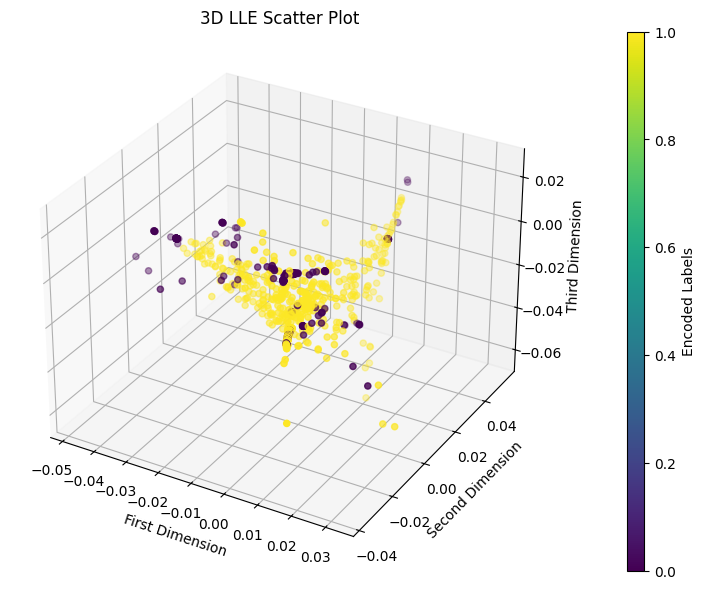

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X_sample_lle = np.random.choice(len(lle_result), size=1000, replace=False)
lle_sample_result = lle_result[X_sample_lle]
y_sample_lle = y_new.iloc[X_sample_lle]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter_lle = ax.scatter(
    lle_sample_result[:, 0],  # First MDS Dimension
    lle_sample_result[:, 1],  # Second MDS Dimension
    lle_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_lle,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D LLE Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_lle, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

### t-SNE
- there's a clear separation between nonphishing and phishing data

In [33]:
tsne_result1 = TSNE(n_components=3, perplexity=3, random_state=42).fit_transform(X_new)
tsne_result2 = TSNE(n_components=2, perplexity=3, random_state=42).fit_transform(X_new)

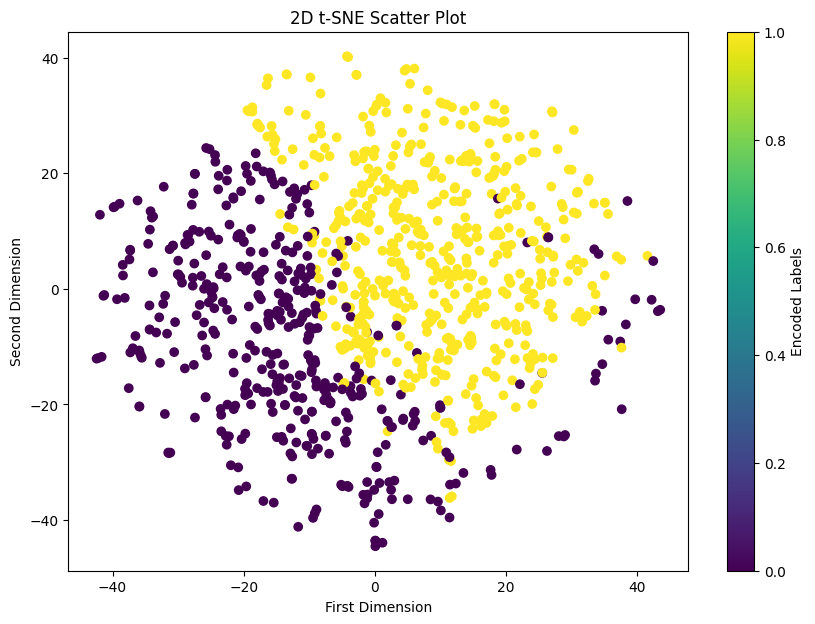

In [34]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_sample_tsne = np.random.choice(len(tsne_result1), size=1000, replace=False)
tsne_sample_result = tsne_result1[X_sample_tsne]
y_sample_tsne = y_new.iloc[X_sample_tsne]

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))
scatter_tsne = plt.scatter(
    tsne_sample_result[:, 0],  # First Dimension
    tsne_sample_result[:, 1],  # Second Dimension
    c=y_sample_tsne,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
plt.title('2D t-SNE Scatter Plot')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_tsne)
cbar.set_label('Encoded Labels')

plt.show()

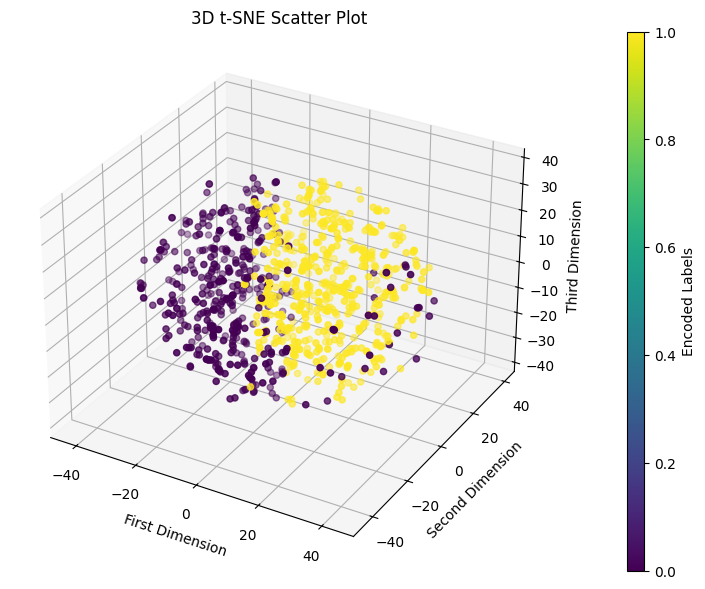

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X_sample_tsne = np.random.choice(len(tsne_result1), size=1000, replace=False)
tsne_sample_result = tsne_result1[X_sample_tsne]
y_sample_tsne = y_new.iloc[X_sample_tsne]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
scatter_tsne = ax.scatter(
    tsne_sample_result[:, 0],  # First MDS Dimension
    tsne_sample_result[:, 1],  # Second MDS Dimension
    tsne_sample_result[:, 2],  # Third MDS Dimension
    c=y_sample_tsne,           # Color by label
    cmap='viridis'
)

# Add axis labels and title
ax.set_title('3D t-SNE Scatter Plot')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

# Add a color bar
cbar = plt.colorbar(scatter_tsne, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

Clustering Analysis (Authored by Cory Suzuki)

So far, t-SNE has provided good dimensions to work with the data in both 2D and 3D, so let's use the dimensionally reduced data in 2 and 3 dimensions with some clustering algorithms such as Agglomerative Clustering, KMeans, MiniBatch KMeans, and DBSCAN. Please note that other dimensionality-reduced data other than the t-SNE could be used here if they had produced good separability between the class labels. Here we define "good separability" by clearly visualizing large distances between the data points from each cluster, so purple and yellow data points should be clearly distinguishable and unmixed as much as possible.

In [36]:
# Import necessary clustering libraries. 

from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from timeit import timeit

In [37]:
tsne_usage1 = pd.DataFrame(tsne_result1)
tsne_usage1.columns = ['P1', 'P2', 'P3']
tsne_usage2 = pd.DataFrame(tsne_result2)
tsne_usage2.columns = ['P1', 'P2']

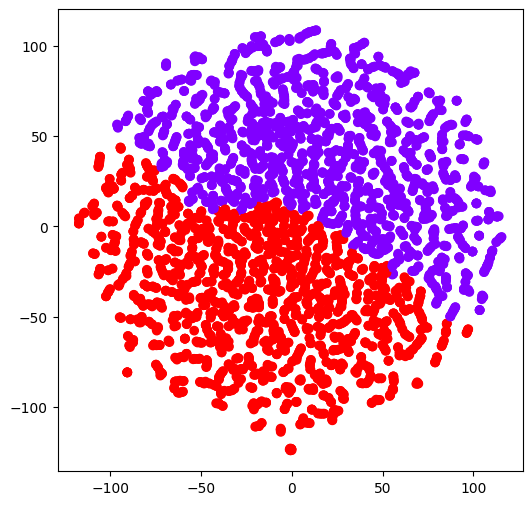

In [38]:
# Agglomerative Clustering in 2D

aggl1 = AgglomerativeClustering(n_clusters=2)
aggl2 = AgglomerativeClustering(n_clusters=3)
aggl3 = AgglomerativeClustering(n_clusters=4)
aggl4 = AgglomerativeClustering(n_clusters=5)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage2['P1'], tsne_usage2['P2'],
            c = aggl1.fit_predict(tsne_usage2), cmap='rainbow')
plt.show()

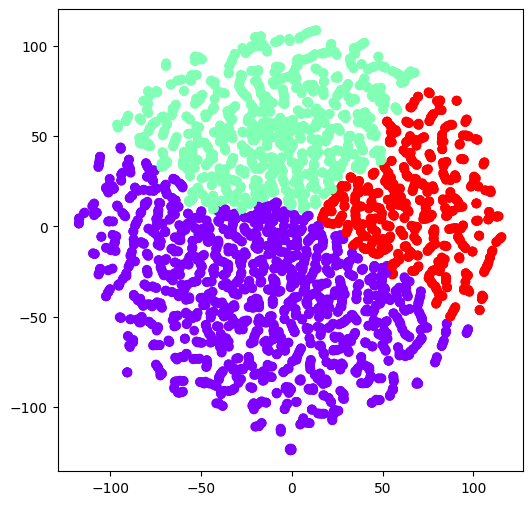

In [39]:
plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage2['P1'], tsne_usage2['P2'],
            c = aggl2.fit_predict(tsne_usage2), cmap='rainbow')
plt.show()

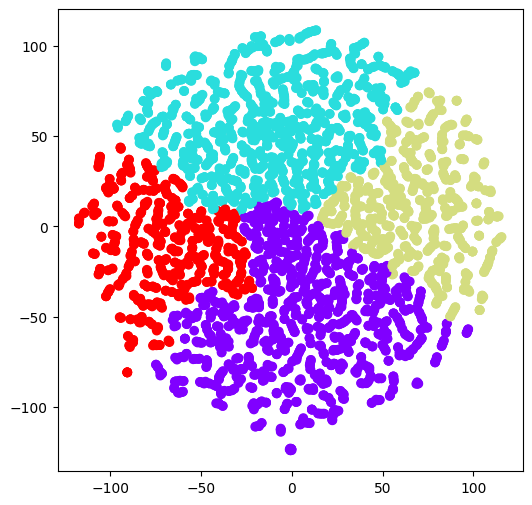

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage2['P1'], tsne_usage2['P2'],
            c = aggl3.fit_predict(tsne_usage2), cmap='rainbow')
plt.show()

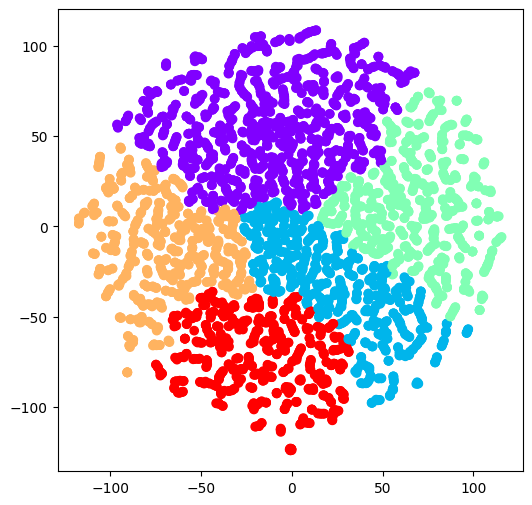

In [41]:
plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage2['P1'], tsne_usage2['P2'],
            c = aggl4.fit_predict(tsne_usage2), cmap='rainbow')
plt.show()

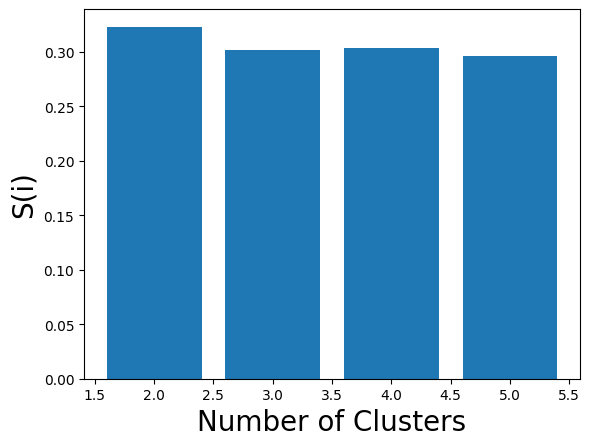

In [42]:
# Silhoutte Scores for Agglomerative Clustering in 2D

ks = [2,3,4,5]
silhouette_scores = []
silhouette_scores.append(
    silhouette_score(tsne_usage2, aggl1.fit_predict(tsne_usage2))
)
silhouette_scores.append(
    silhouette_score(tsne_usage2, aggl2.fit_predict(tsne_usage2))
)
silhouette_scores.append(
    silhouette_score(tsne_usage2, aggl3.fit_predict(tsne_usage2))
)
silhouette_scores.append(
    silhouette_score(tsne_usage2, aggl4.fit_predict(tsne_usage2))
)


plt.bar(ks, silhouette_scores)
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('S(i)', fontsize=20)
plt.show()

According to the Silhouette Bar Graph Above, the most optimal value for k is 2. Let's use this for KMeans as well.

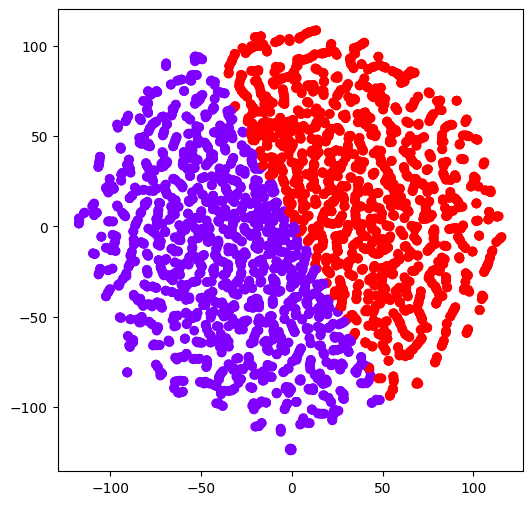

In [43]:
# KMeans Clustering in 2D

k = 2
kmeans = KMeans(n_clusters=k, n_init=2, random_state=42)
kmeans.fit(tsne_usage2)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage2['P1'], tsne_usage2['P2'],
            c = kmeans.fit_predict(tsne_usage2), cmap='rainbow')
plt.show()

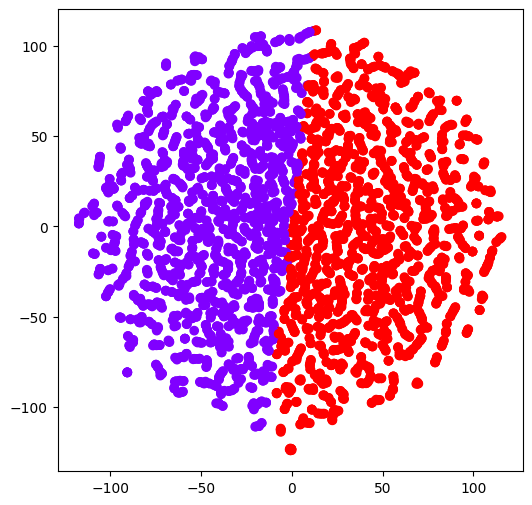

In [44]:
# MiniBatch KMeans Clustering in 2D

k = 2
kmeans = MiniBatchKMeans(n_clusters=k, n_init=2, random_state=42)
kmeans.fit(tsne_usage2)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage2['P1'], tsne_usage2['P2'],
            c = kmeans.fit_predict(tsne_usage2), cmap='rainbow')
plt.show()

2/10

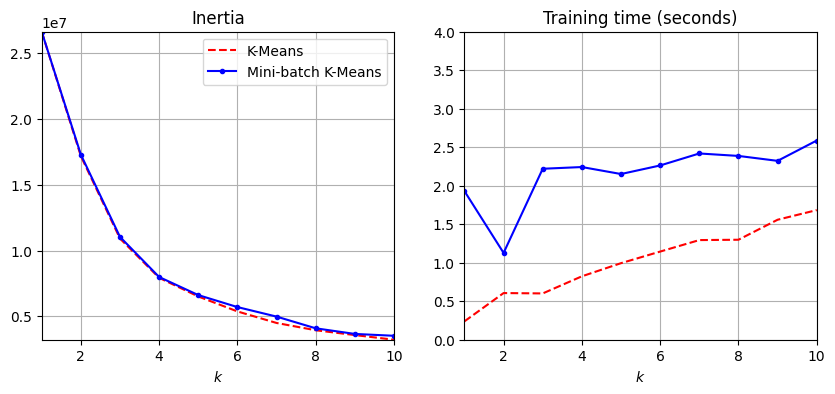

In [45]:
max_k = 10
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for j in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=j, n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=j, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[j - 1, 0] = timeit("kmeans_.fit_predict(tsne_usage2)", number=10, globals=globals())
    times[j - 1, 1] = timeit("minibatch_kmeans.fit_predict(tsne_usage2)", number=10,
                             globals=globals())
    inertias[j - 1, 0] = kmeans_.inertia_
    inertias[j - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, np.min(inertias), np.max(inertias)])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()

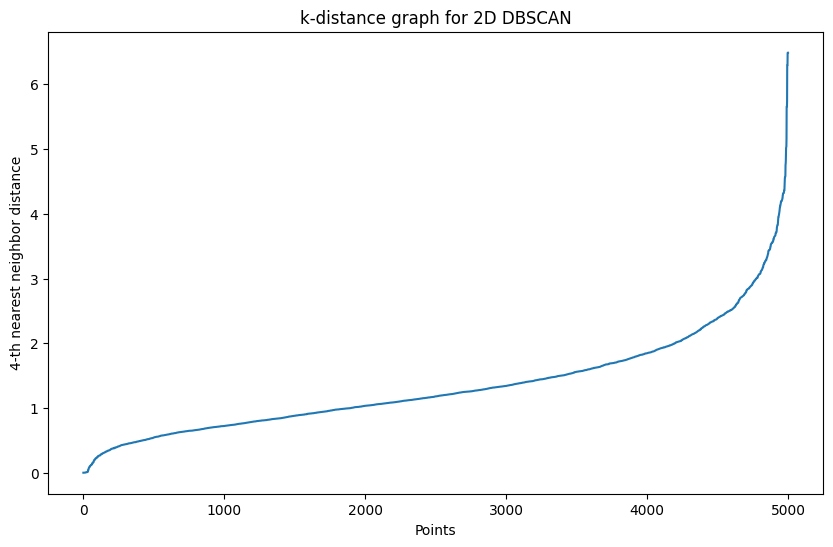

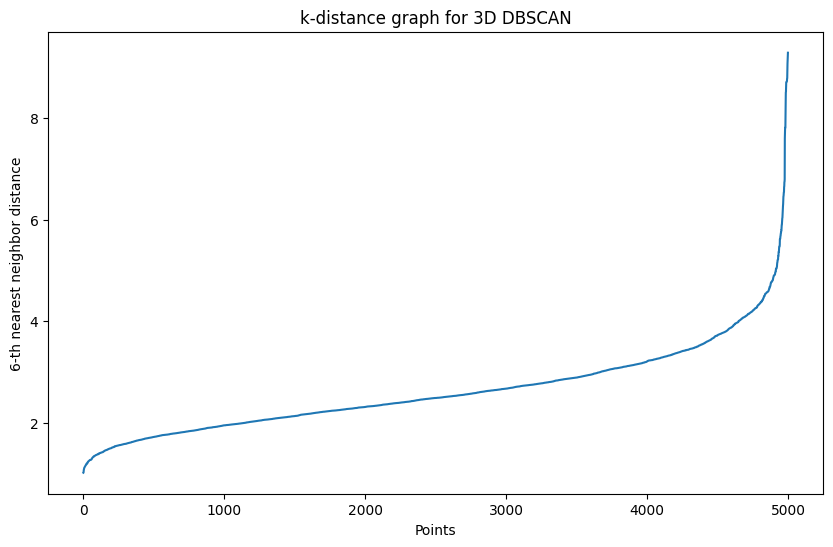

In [56]:
# Extra Code for Further Future Work: Semi-Supervised Epsilon and MinPts Tuning

from sklearn.neighbors import NearestNeighbors

def plot_k_distance_graph(X, k, title):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title(title)
    plt.show()
# Plot k-distance graph
plot_k_distance_graph(tsne_usage2, k=4, title='k-distance graph for 2D DBSCAN')
plot_k_distance_graph(tsne_usage1, k=6, title='k-distance graph for 3D DBSCAN')

So from the above k distance graph, we use the guideline for minpts as 2 * dimensions = 2*2=4. So we can find the optimal value for epsilon at the elbow between the number of points and 4th nearest neighbors calculated, so choose epsilon = 2.5 and minpts=4 in the 2D case. Now for the 3D case using similar logic, choose epsilon=4 and minpts=6.

[[-18.287106   32.019917 ]
 [-51.32519    20.32174  ]
 [-83.4241      7.2047143]
 ...
 [ 21.262001   54.004456 ]
 [-91.291374  -26.215014 ]
 [ 64.498825  -71.19374  ]]


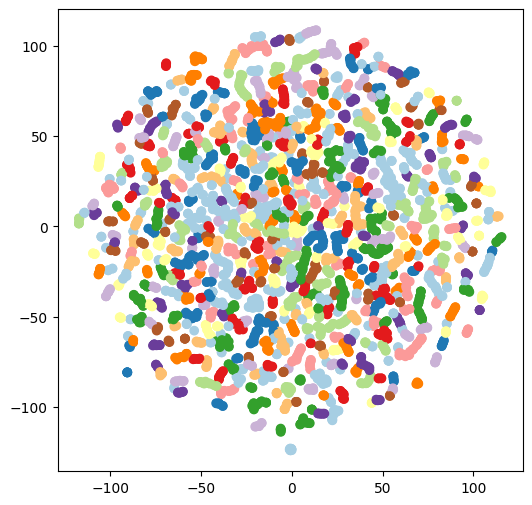

In [48]:
# DBSCAN Clustering in 2D (Not too good)

dbscan = DBSCAN(eps=2.5, min_samples=4)
dbscan.fit(tsne_usage2)
print(dbscan.components_)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_usage2['P1'], tsne_usage2['P2'],
            c = dbscan.fit_predict(tsne_usage2), cmap='Paired')
plt.show()

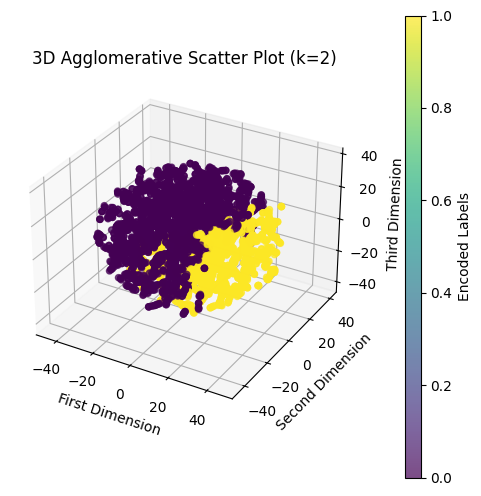

In [61]:
# Agglomerative Clustering in 3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
aggscat1 = ax.scatter(tsne_usage1['P1'], tsne_usage1['P2'], tsne_usage1['P3'],
            c = aggl1.fit_predict(tsne_usage1), cmap='viridis', alpha=0.7)


ax.set_title('3D Agglomerative Scatter Plot (k=2)')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

cbar = plt.colorbar(aggscat1, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

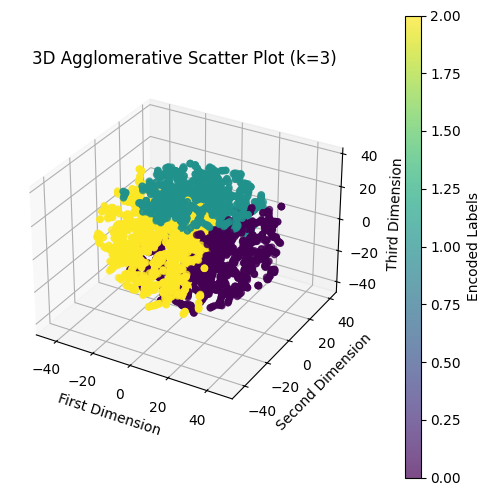

In [62]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
aggscat2 = ax.scatter(tsne_usage1['P1'], tsne_usage1['P2'], tsne_usage1['P3'],
            c = aggl2.fit_predict(tsne_usage1), cmap='viridis', alpha=0.7)


ax.set_title('3D Agglomerative Scatter Plot (k=3)')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

cbar = plt.colorbar(aggscat2, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

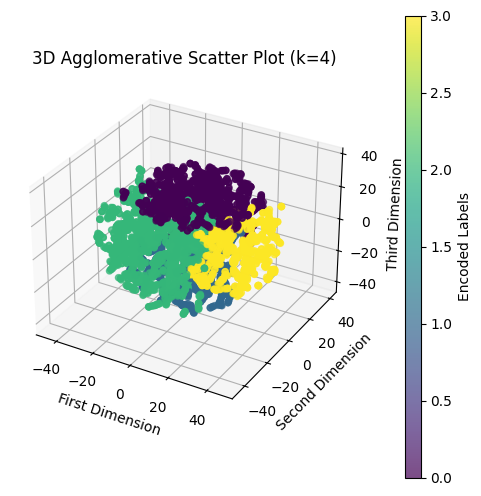

In [63]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
aggscat3 = ax.scatter(tsne_usage1['P1'], tsne_usage1['P2'], tsne_usage1['P3'],
            c = aggl3.fit_predict(tsne_usage1), cmap='viridis', alpha=0.7)


ax.set_title('3D Agglomerative Scatter Plot (k=4)')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

cbar = plt.colorbar(aggscat3, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

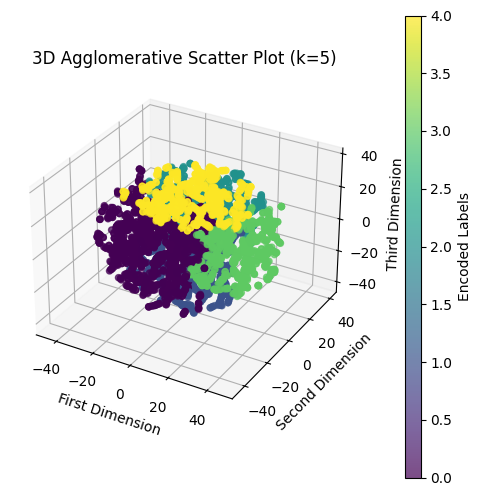

In [64]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
aggscat4 = ax.scatter(tsne_usage1['P1'], tsne_usage1['P2'], tsne_usage1['P3'],
            c = aggl4.fit_predict(tsne_usage1), cmap='viridis', alpha=0.7)


ax.set_title('3D Agglomerative Scatter Plot (k=5)')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

cbar = plt.colorbar(aggscat4, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

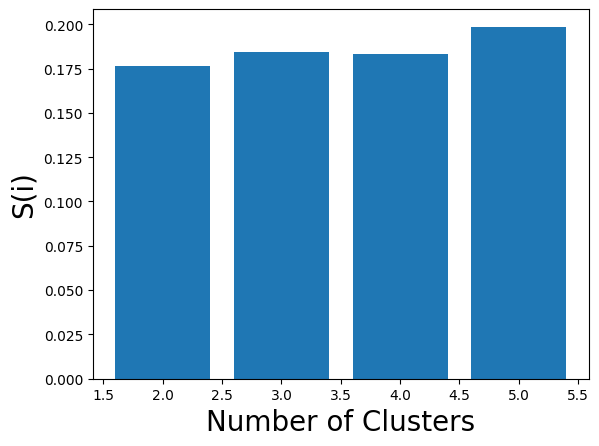

In [ ]:
# Silhoutte Scores for Agglomerative Clustering 3D

ks = [2,3,4,5]
silhouette_scores_3d = []
silhouette_scores_3d.append(
    silhouette_score(tsne_usage1, aggl1.fit_predict(tsne_usage1))
)
silhouette_scores_3d.append(
    silhouette_score(tsne_usage1, aggl2.fit_predict(tsne_usage1))
)
silhouette_scores_3d.append(
    silhouette_score(tsne_usage1, aggl3.fit_predict(tsne_usage1))
)
silhouette_scores_3d.append(
    silhouette_score(tsne_usage1, aggl4.fit_predict(tsne_usage1))
)

plt.bar(ks, silhouette_scores_3d)
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('S(i)', fontsize=20)
plt.show()

Therefore we know that the optimal number of clusters is 5 according to the silhouette score bar graph for the 3 dimensional T-SNE reduced data. This does not make sense as our dataset classifies emails as either phishing spam or not, so the 2D Silhouette results made more sense since we had seen that k=2 provided the best clustering, provided we know from ground truth that there are only two labels.

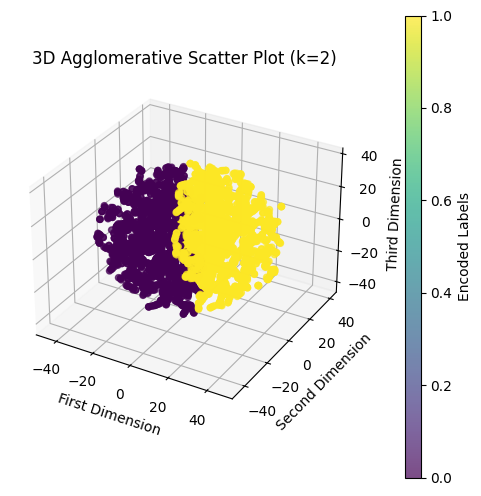

In [ ]:
# KMeans and MiniBatch KMeans in 3D
k = 2
kmeans = KMeans(n_clusters=k, n_init=2, random_state=42)
kmeans.fit(tsne_usage1)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
kmeanscat = ax.scatter(tsne_usage1['P1'], tsne_usage1['P2'], tsne_usage1['P3'],
            c = kmeans.fit_predict(tsne_usage1), cmap='viridis', alpha=0.7)


ax.set_title('3D KMeans Scatter Plot (k=2)')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

cbar = plt.colorbar(kmeanscat, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

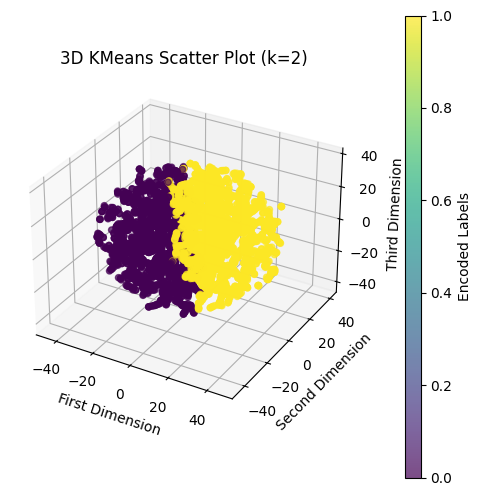

In [66]:
k = 2
kmeansbatch = MiniBatchKMeans(n_clusters=k, n_init=2, random_state=42)
kmeansbatch.fit(tsne_usage1)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
kmeanbatchscat = ax.scatter(tsne_usage1['P1'], tsne_usage1['P2'], tsne_usage1['P3'],
            c = kmeansbatch.fit_predict(tsne_usage1), cmap='viridis', alpha=0.7)


ax.set_title('3D KMeans Scatter Plot (k=2)')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

cbar = plt.colorbar(kmeanbatchscat, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

[[  7.8709054  19.66559   -19.193682 ]
 [-17.616598   10.59792   -25.014751 ]
 [-21.822601  -15.438596  -18.2155   ]
 ...
 [  2.6547167  16.456459   30.815704 ]
 [-34.365025   -2.8703206 -14.330247 ]
 [ 15.151046  -24.165764   -2.603836 ]]


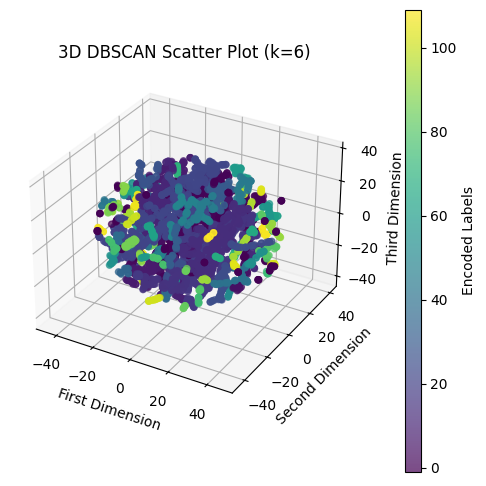

In [53]:
# DBSCAN in 3D

dbscan = DBSCAN(eps=4, min_samples=6)
dbscan.fit(tsne_usage1)
print(dbscan.components_)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
dbscanscat = ax.scatter(tsne_usage1['P1'], tsne_usage1['P2'], tsne_usage1['P3'],
            c = dbscan.fit_predict(tsne_usage1), cmap='viridis', alpha=0.7)


ax.set_title('3D DBSCAN Scatter Plot (k=6)')
ax.set_xlabel('First Dimension')
ax.set_ylabel('Second Dimension')
ax.set_zlabel('Third Dimension')

cbar = plt.colorbar(dbscanscat, ax=ax, pad=0.1, aspect=30)
cbar.set_label('Encoded Labels')

plt.show()

Once again, it can be clearly seen that DBSCAN fails to distinguish between the binary classes here, however Agglomerative Clustering and KMeans yielded promising results.

DBSCAN did not do well on clustering since it failed to classify the binary classes, however it seems as though KMeans performed the best since the separability is clearer, but Agglomerative Clustering
did a decent performance as well.

Now to verify between KMeans and Agglomerative Clustering performing better, let us use the Adjusted Rand Index (ARI) to compute the similarity between the predicted output from each of the three clusterings versus the ground truth labels. From below, Agglomerative and DBSCAN have similar ARI, but KMeans performs the best overall on the 3D data with a high ARI of 0.4943.

In [69]:
from sklearn.metrics import adjusted_rand_score

ari_agg2d = adjusted_rand_score(y_encoded, aggl1.fit_predict(tsne_usage2))
ari_kmeans2d = adjusted_rand_score(y_encoded, kmeans.fit_predict(tsne_usage2))
ari_dbscan2d = adjusted_rand_score(y_encoded, dbscan.fit_predict(tsne_usage2))
ari_batchkmeans2d = adjusted_rand_score(y_encoded, kmeansbatch.fit_predict(tsne_usage2))
print("The ARI results for the 2 dimensional t-SNE reduced data are as follows:")
print(ari_agg2d)
print(ari_kmeans2d)
print(ari_dbscan2d)
print(ari_batchkmeans2d)

ari_agg3d = adjusted_rand_score(y_encoded, aggl1.fit_predict(tsne_usage1))
ari_kmeans3d = adjusted_rand_score(y_encoded, kmeans.fit_predict(tsne_usage1))
ari_dbscan3d = adjusted_rand_score(y_encoded, dbscan.fit_predict(tsne_usage1))
ari_batchkmeans3d = adjusted_rand_score(y_encoded, kmeansbatch.fit_predict(tsne_usage1))
print("The ARI results for the 3 dimensional t-SNE reduced data are as follows:")
print(ari_agg3d)
print(ari_kmeans3d)
print(ari_dbscan3d)
print(ari_batchkmeans3d)

The ARI results for the 2 dimensional t-SNE reduced data are as follows:
0.1556993387112026
0.23682440569498056
0.005641122000862753
0.23682440569498056
The ARI results for the 3 dimensional t-SNE reduced data are as follows:
0.015470610416534613
0.5345512048014981
0.015891926292086245
0.5345512048014981
